In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = np.load('../bases/Titanic.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = data['X_treino'], data['X_teste'], data['y_treino'], data['y_teste'], list(data['feature_names'])

In [3]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
}

In [4]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


In [5]:
bayes_search = BayesSearchCV(DecisionTreeClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 10, 'min_samples_split': 2})
Melhor pontuação de validação cruzada: 0.80


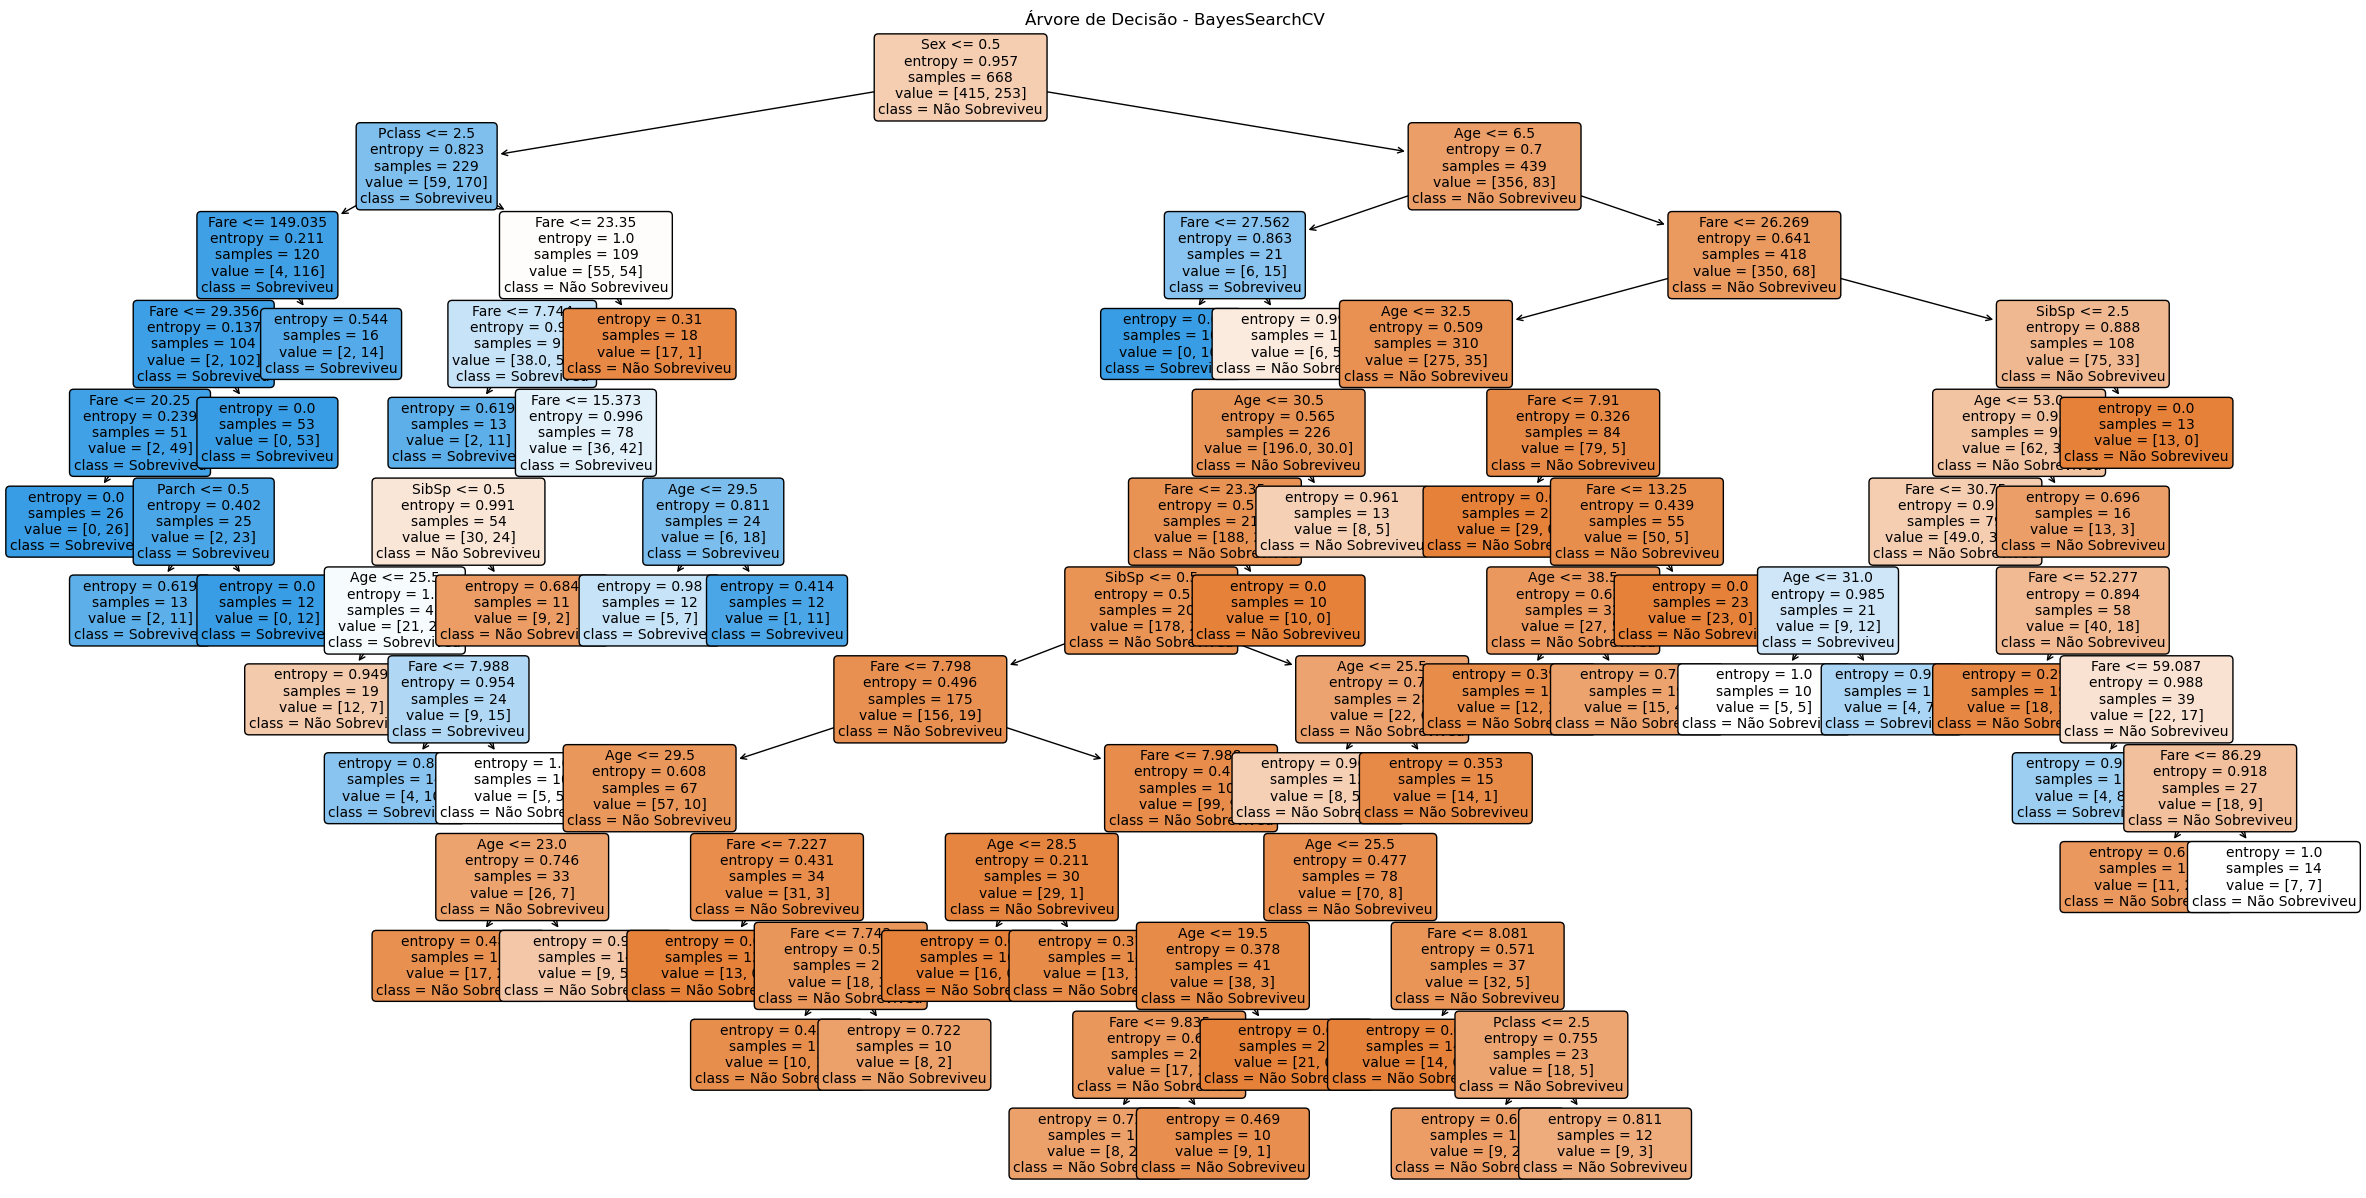

In [ ]:
best_model_bayes = bayes_search.best_estimator_
#plot_decision_tree(best_model_bayes, feature_names, ['Não Sobreviveu', 'Sobreviveu'], "Árvore de Decisão - BayesSearchCV")

In [7]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.79


In [ ]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       134
           1       0.78      0.67      0.72        89

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



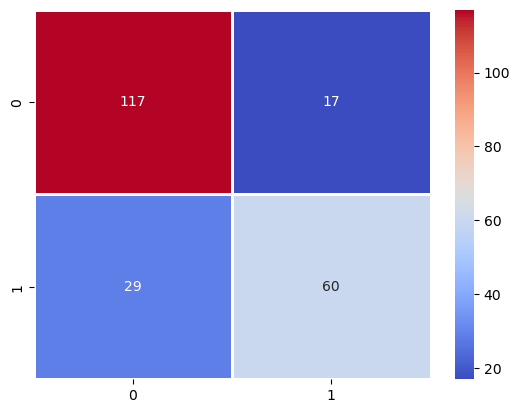

In [16]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()